In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
nyc = gpd.read_file('../data/Borough_Boundaries.geojson')
print(nyc.crs)
nyc.head()

epsg:4326


boro_code      boro_name     shape_area     shape_leng  \
0         4         Queens  3040205594.95  900269.280485   
1         3       Brooklyn  1934167333.21  728477.954082   
2         5  Staten Island  1623631283.36  325924.002076   
3         1      Manhattan  636620785.519  359993.126318   
4         2          Bronx  1187193588.79  463868.599917   

                                            geometry  
0  MULTIPOLYGON (((-73.82645 40.59053, -73.82642 ...  
1  MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
2  MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
3  MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...  
4  MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...

In [3]:
type(nyc)

geopandas.geodataframe.GeoDataFrame

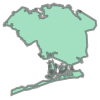

In [4]:
nyc.loc[0, 'geometry']

In [5]:
print(nyc.loc[0, 'geometry'])

MULTIPOLYGON (((-73.82644661516991 40.59052744193831, -73.82642403888464 40.59049483052486, -73.82640914894399 40.59045974688132, -73.82640238825243 40.59042323460854, -73.82640395790071 40.59038637980206, -73.82641381118461 40.59035027874408, -73.82643165499539 40.59031600529457, -73.82645695854175 40.5902845789477, -73.8264889691382 40.59025693450695, -73.8267745715186 40.5900320080855, -73.82681097362916 40.58999305153171, -73.8268542600488 40.58995842799489, -73.82690355436803 40.58992883848113, -73.82695785854278 40.58990488207443, -73.82701607309994 40.58988704380752, -73.82713881899797 40.58985224993937, -73.82725825688735 40.58981130855536, -73.82737385766713 40.58976440102488, -73.82737543424058 40.58978519204887, -73.82737265672866 40.58980590986252, -73.82736559571907 40.58982602790974, -73.82735443066846 40.58984503487772, -73.82733944534036 40.58986244769183, -73.82732102059438 40.58987782379372, -73.8273183991794 40.58988942277339, -73.82731837807653 40.5899011926368, -73

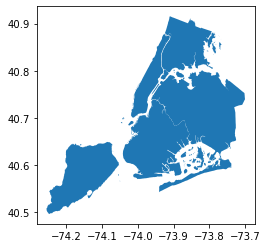

In [6]:
nyc.plot();

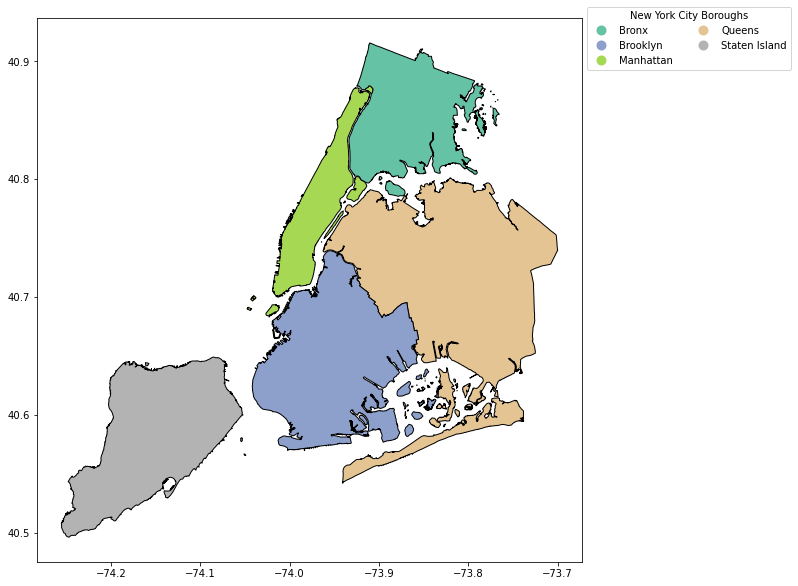

In [7]:
leg_kwds = {'title': 'New York City Boroughs', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

nyc.plot(column = 'boro_name', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

Let's First Start With the Metro-North Rail Road

In [8]:
metro_north = pd.read_csv('../data/MNRR.csv')
metro_north.head()

NAME          Railroad_Name              Railroad_Line  \
0    Grand Central Terminal  Metro-North Rail Road  Hudson, Harlem, New Haven   
1       Harlem-125th Street  Metro-North Rail Road  Hudson, Harlem, New Haven   
2  Yankees-E. 153rd Street   Metro-North Rail Road                     Hudson   
3            Morris Heights  Metro-North Rail Road                     Hudson   
4        University Heights  Metro-North Rail Road                     Hudson   

     County     State   Latitude  Longitude  
0  New York  New York  40.752713 -73.977258  
1  New York  New York  40.805253 -73.938858  
2     Bronx  New York  40.825572 -73.930145  
3     Bronx  New York  40.854150 -73.919824  
4     Bronx  New York  40.862033 -73.913455

In [9]:
metro_north = metro_north[['NAME','County','Latitude','Longitude']]
metro_north.head()

NAME    County   Latitude  Longitude
0    Grand Central Terminal  New York  40.752713 -73.977258
1       Harlem-125th Street  New York  40.805253 -73.938858
2  Yankees-E. 153rd Street      Bronx  40.825572 -73.930145
3            Morris Heights     Bronx  40.854150 -73.919824
4        University Heights     Bronx  40.862033 -73.913455

In [10]:
metro_north.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       112 non-null    object 
 1   County     112 non-null    object 
 2   Latitude   112 non-null    float64
 3   Longitude  112 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.6+ KB


In [11]:
metro_north['geometry'] = metro_north.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
metro_north.head(3)

NAME    County   Latitude  Longitude  \
0    Grand Central Terminal  New York  40.752713 -73.977258   
1       Harlem-125th Street  New York  40.805253 -73.938858   
2  Yankees-E. 153rd Street      Bronx  40.825572 -73.930145   

                                 geometry  
0        POINT (-73.97725798 40.75271277)  
1  POINT (-73.93885803000001 40.80525319)  
2        POINT (-73.93014497 40.82557156)

In [12]:
mnrr_geo = gpd.GeoDataFrame(metro_north, 
                           crs = nyc.crs, 
                           geometry = metro_north['geometry'])

In [13]:
type(mnrr_geo)

geopandas.geodataframe.GeoDataFrame

Let's now add the Long Island Rail Road

In [14]:
lirr = pd.read_csv('../data/LIRR.csv')
lirr.head()

the_geom          Partial_Lat  \
0   POINT (-73.95639000000006 40.74128000000003)   40.74128000000003)   
1   POINT (-73.94679000000005 40.74238000000003)   40.74238000000003)   
2   POINT (-73.99358000000005 40.75058000000003)   40.75058000000003)   
3   POINT (-73.90297000000005 40.74584000000004)   40.74584000000004)   
4  POINT (-73.84481000000005 40.719570000000026)  40.719570000000026)   

   Latitude               Partial_Long  Longitude                 NAME  \
0  40.74128  POINT (-73.95639000000006  -73.95639     Long Island City   
1  40.74238  POINT (-73.94679000000005  -73.94679  Hunterspoint Avenue   
2  40.75058  POINT (-73.99358000000005  -73.99358         Penn Station   
3  40.74584  POINT (-73.90297000000005  -73.90297             Woodside   
4  40.71957  POINT (-73.84481000000005  -73.84481         Forest Hills   

     County               Operator               Route     State  
0    Queens  Long Island Rail Road  City Terminal Zone  New York  
1    Queens  Long Island Rail Road  City Terminal Zone  New York  
2  New York  Long Island Rail Road  City Terminal Zone  New York  
3    Queens  Long Island Rail Road  City Terminal Zone  New York  
4    Queens  Long Island Rail Road  City Terminal Zone  New York

In [15]:
#lirr = lirr[['the_geom','Latitude','Longitude','NAME','County']]
#lirr.head()

In [16]:
lirr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   the_geom      124 non-null    object 
 1   Partial_Lat   124 non-null    object 
 2   Latitude      124 non-null    float64
 3   Partial_Long  124 non-null    object 
 4   Longitude     124 non-null    float64
 5   NAME          124 non-null    object 
 6   County        123 non-null    object 
 7   Operator      124 non-null    object 
 8   Route         124 non-null    object 
 9   State         124 non-null    object 
dtypes: float64(2), object(8)
memory usage: 9.8+ KB


In [17]:
#lirr["Longitude"] = lirr.Longitude.astype(float)

In [18]:
lirr['geometry'] = lirr.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
lirr.head(3)

the_geom         Partial_Lat  Latitude  \
0  POINT (-73.95639000000006 40.74128000000003)  40.74128000000003)  40.74128   
1  POINT (-73.94679000000005 40.74238000000003)  40.74238000000003)  40.74238   
2  POINT (-73.99358000000005 40.75058000000003)  40.75058000000003)  40.75058   

                Partial_Long  Longitude                 NAME    County  \
0  POINT (-73.95639000000006  -73.95639     Long Island City    Queens   
1  POINT (-73.94679000000005  -73.94679  Hunterspoint Avenue    Queens   
2  POINT (-73.99358000000005  -73.99358         Penn Station  New York   

                Operator               Route     State  \
0  Long Island Rail Road  City Terminal Zone  New York   
1  Long Island Rail Road  City Terminal Zone  New York   
2  Long Island Rail Road  City Terminal Zone  New York   

                              geometry  
0           POINT (-73.95639 40.74128)  
1  POINT (-73.94678999999999 40.74238)  
2  POINT (-73.99357999999999 40.75058)

In [19]:
lirr_geo = gpd.GeoDataFrame(lirr, 
                           crs = nyc.crs, 
                           geometry = lirr['geometry'])

In [20]:
type(lirr)

pandas.core.frame.DataFrame

Now we'll add NJ Transit

In [21]:
nj_transit = pd.read_csv('../data/NJ_Transit_Rail.csv')
nj_transit.head()

OBJECTID_1                  NAME    County  Latitude  Longitude ATIS_ID  \
0           1  Point Pleasant Beach     Ocean  40.09272  -74.04819     123   
1           2           Spring Lake  Monmouth  40.15057  -74.03546     142   
2           3                Belmar  Monmouth  40.18059  -74.02730      15   
3           4         Bradley Beach  Monmouth  40.20378  -74.01896      22   
4           5           Asbury Park  Monmouth  40.21536  -74.01479       8   

   SE_ANNO_CAD_DATA LINE_CODE     LAYER          MUNICIPALITY RAIL_SERVICE  \
0               NaN        NC  STATIONS  Point Pleasant Beach           NC   
1               NaN        NC  STATIONS           Spring Lake           NC   
2               NaN        NC  STATIONS                Belmar           NC   
3               NaN        NC  STATIONS           Neptune Twp           NC   
4               NaN        NC  STATIONS           Asbury Park           NC   

   ADA       State    Operator                    Route  
0  YES  New Jersey  NJ Transit  North Jersey Coast Line  
1   NO  New Jersey  NJ Transit  North Jersey Coast Line  
2   NO  New Jersey  NJ Transit  North Jersey Coast Line  
3   NO  New Jersey  NJ Transit  North Jersey Coast Line  
4  YES  New Jersey  NJ Transit  North Jersey Coast Line

In [22]:
nj_transit = nj_transit[['NAME','County','Latitude','Longitude']]
nj_transit.head()

NAME    County  Latitude  Longitude
0  Point Pleasant Beach     Ocean  40.09272  -74.04819
1           Spring Lake  Monmouth  40.15057  -74.03546
2                Belmar  Monmouth  40.18059  -74.02730
3         Bradley Beach  Monmouth  40.20378  -74.01896
4           Asbury Park  Monmouth  40.21536  -74.01479

In [23]:
nj_transit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       157 non-null    object 
 1   County     157 non-null    object 
 2   Latitude   157 non-null    float64
 3   Longitude  157 non-null    float64
dtypes: float64(2), object(2)
memory usage: 5.0+ KB


In [24]:
nj_transit['geometry'] = nj_transit.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
nj_transit.head(3)

NAME    County  Latitude  Longitude  \
0  Point Pleasant Beach     Ocean  40.09272  -74.04819   
1           Spring Lake  Monmouth  40.15057  -74.03546   
2                Belmar  Monmouth  40.18059  -74.02730   

                              geometry  
0  POINT (-74.04819000000001 40.09272)  
1           POINT (-74.03546 40.15057)  
2            POINT (-74.0273 40.18059)

In [25]:
njt_geo = gpd.GeoDataFrame(nj_transit, 
                           crs = nyc.crs, 
                           geometry = nj_transit['geometry'])

In [26]:
type(nj_transit)

pandas.core.frame.DataFrame

Now we'll add the Staten Island Railway

In [27]:
sir = pd.read_csv('../data/SIR.csv')
sir.head()

NAME          Railroad_Name Railroad_Line    County     State  \
0     St. George  Staten Island Railway           SIR  Richmond  New York   
1  Tompkinsville  Staten Island Railway           SIR  Richmond  New York   
2      Stapleton  Staten Island Railway           SIR  Richmond  New York   
3        Clifton  Staten Island Railway           SIR  Richmond  New York   
4       Grasmere  Staten Island Railway           SIR  Richmond  New York   

    Latitude  Longitude  
0  40.644013 -74.073324  
1  40.637709 -74.074987  
2  40.627907 -74.075189  
3  40.621355 -74.071526  
4  40.603658 -74.083550

In [28]:
sir = sir[['NAME','County','Latitude','Longitude']]
sir.head()

NAME    County   Latitude  Longitude
0     St. George  Richmond  40.644013 -74.073324
1  Tompkinsville  Richmond  40.637709 -74.074987
2      Stapleton  Richmond  40.627907 -74.075189
3        Clifton  Richmond  40.621355 -74.071526
4       Grasmere  Richmond  40.603658 -74.083550

In [29]:
sir.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       21 non-null     object 
 1   County     21 non-null     object 
 2   Latitude   21 non-null     float64
 3   Longitude  21 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


In [30]:
sir['geometry'] = sir.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
sir.head(3)

NAME    County   Latitude  Longitude  \
0     St. George  Richmond  40.644013 -74.073324   
1  Tompkinsville  Richmond  40.637709 -74.074987   
2      Stapleton  Richmond  40.627907 -74.075189   

                           geometry  
0   POINT (-74.0733245 40.64401273)  
1  POINT (-74.07498692 40.63770878)  
2  POINT (-74.07518867 40.62790712)

In [31]:
sir_geo = gpd.GeoDataFrame(sir, 
                           crs = nyc.crs, 
                           geometry = sir['geometry'])

In [32]:
type(sir)

pandas.core.frame.DataFrame

Last we'll add the CT Railway

In [33]:
ct_railway = pd.read_csv('../data/CT_Rail.csv')
ct_railway.head()

NAME Railroad_Name    Railroad_Line     County        State  \
0       Stamford       CT Rail  Shore Line East  Fairfield  Connecticut   
1  South Norwalk       CT Rail  Shore Line East  Fairfield  Connecticut   
2     Bridgeport       CT Rail  Shore Line East  Fairfield  Connecticut   
3        Milford       CT Rail  Shore Line East  New Haven  Connecticut   
4     West Haven       CT Rail  Shore Line East  New Haven  Connecticut   

    Latitude  Longitude  
0  41.046914 -73.542123  
1  41.095427 -73.422516  
2  41.177823 -73.187141  
3  41.222696 -73.059626  
4  41.271235 -72.963310

In [34]:
ct_railway = ct_railway[['NAME','County','Latitude','Longitude']]
ct_railway.head()

NAME     County   Latitude  Longitude
0       Stamford  Fairfield  41.046914 -73.542123
1  South Norwalk  Fairfield  41.095427 -73.422516
2     Bridgeport  Fairfield  41.177823 -73.187141
3        Milford  New Haven  41.222696 -73.059626
4     West Haven  New Haven  41.271235 -72.963310

In [35]:
ct_railway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   NAME       21 non-null     object 
 1   County     21 non-null     object 
 2   Latitude   21 non-null     float64
 3   Longitude  21 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


In [36]:
ct_railway['geometry'] = sir.apply(lambda x: Point((x.Longitude, 
                                                         x.Latitude)), 
                                        axis=1)
ct_railway.head(3)

NAME     County   Latitude  Longitude  \
0       Stamford  Fairfield  41.046914 -73.542123   
1  South Norwalk  Fairfield  41.095427 -73.422516   
2     Bridgeport  Fairfield  41.177823 -73.187141   

                           geometry  
0   POINT (-74.0733245 40.64401273)  
1  POINT (-74.07498692 40.63770878)  
2  POINT (-74.07518867 40.62790712)

In [37]:
ctr_geo = gpd.GeoDataFrame(ct_railway, 
                           crs = nyc.crs, 
                           geometry = ct_railway['geometry'])

In [38]:
type(ct_railway)

pandas.core.frame.DataFrame

Now we'll start adding plots to the maps.

In [39]:
nyc.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [40]:
nyc_area_center = ['40.71','-74.00']
print(nyc_area_center)

['40.71', '-74.00']


In [41]:
i = 0
for row_index, row_values in metro_north.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')
       i+=1

index is 0
values are:
 
NAME                   Grand Central Terminal
County                               New York
Latitude                            40.752713
Longitude                          -73.977258
geometry     POINT (-73.97725798 40.75271277)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
NAME                            Harlem-125th Street
County                                     New York
Latitude                                  40.805253
Longitude                                -73.938858
geometry     POINT (-73.93885803000001 40.80525319)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
NAME                 Yankees-E. 153rd Street 
County                                  Bronx
Latitude                            40.825572
Longitude                          -73.930145
geometry     POINT (-73.93014497 40.82557156)
Name: 2, dtype: object
------------------------- 


In [42]:
i = 0
for row_index, row_values in lirr.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')
       i+=1

index is 0
values are:
 
the_geom        POINT (-73.95639000000006 40.74128000000003)
Partial_Lat                               40.74128000000003)
Latitude                                            40.74128
Partial_Long                       POINT (-73.95639000000006
Longitude                                          -73.95639
NAME                                        Long Island City
County                                                Queens
Operator                               Long Island Rail Road
Route                                     City Terminal Zone
State                                               New York
geometry                          POINT (-73.95639 40.74128)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
the_geom        POINT (-73.94679000000005 40.74238000000003)
Partial_Lat                               40.74238000000003)
Latitude                                            40.74238
Partial_Long                       POINT (-73.

In [43]:
i = 0
for row_index, row_values in nj_transit.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')

index is 0
values are:
 
NAME                        Point Pleasant Beach
County                                     Ocean
Latitude                                40.09272
Longitude                              -74.04819
geometry     POINT (-74.04819000000001 40.09272)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
NAME                        Spring Lake
County                         Monmouth
Latitude                       40.15057
Longitude                     -74.03546
geometry     POINT (-74.03546 40.15057)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
NAME                            Belmar
County                        Monmouth
Latitude                      40.18059
Longitude                     -74.0273
geometry     POINT (-74.0273 40.18059)
Name: 2, dtype: object
------------------------- 
index is 3
values are:
 
NAME                               Bradley Beach
County                                  Monmouth
Latitude    

NAME                          Metropark
County                        Middlesex
Latitude                       40.56858
Longitude                     -74.32933
geometry     POINT (-74.32933 40.56858)
Name: 126, dtype: object
------------------------- 
index is 127
values are:
 
NAME                           Metuchen
County                        Middlesex
Latitude                       40.54077
Longitude                     -74.36042
geometry     POINT (-74.36042 40.54077)
Name: 127, dtype: object
------------------------- 
index is 128
values are:
 
NAME                                      Edison
County                                 Middlesex
Latitude                                40.51915
Longitude                              -74.41097
geometry     POINT (-74.41097000000001 40.51915)
Name: 128, dtype: object
------------------------- 
index is 129
values are:
 
NAME                      New Brunswick
County                        Middlesex
Latitude                       40.4973

In [44]:
i = 0
for row_index, row_values in sir.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')

index is 0
values are:
 
NAME                              St. George
County                              Richmond
Latitude                           40.644013
Longitude                         -74.073324
geometry     POINT (-74.0733245 40.64401273)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
NAME                            Tompkinsville
County                               Richmond
Latitude                            40.637709
Longitude                          -74.074987
geometry     POINT (-74.07498692 40.63770878)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
NAME                                Stapleton
County                               Richmond
Latitude                            40.627907
Longitude                          -74.075189
geometry     POINT (-74.07518867 40.62790712)
Name: 2, dtype: object
------------------------- 
index is 3
values are:
 
NAME                                  Clifton
County             

In [45]:
i = 0
for row_index, row_values in ct_railway.iterrows():
    if i <3: 
       print('index is', row_index)
       print('values are:')
       print(' ')
       print(row_values)
       print('------------------------- ')

index is 0
values are:
 
NAME                                Stamford
County                             Fairfield
Latitude                           41.046914
Longitude                         -73.542123
geometry     POINT (-74.0733245 40.64401273)
Name: 0, dtype: object
------------------------- 
index is 1
values are:
 
NAME                            South Norwalk
County                              Fairfield
Latitude                            41.095427
Longitude                          -73.422516
geometry     POINT (-74.07498692 40.63770878)
Name: 1, dtype: object
------------------------- 
index is 2
values are:
 
NAME                               Bridgeport
County                              Fairfield
Latitude                            41.177823
Longitude                          -73.187141
geometry     POINT (-74.07518867 40.62790712)
Name: 2, dtype: object
------------------------- 
index is 3
values are:
 
NAME                                  Milford
County             

In [46]:
map_nyc = folium.Map(location =  nyc_area_center, zoom_start = 12)

for row_index, row_values in metro_north.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['NAME'])
    icon=folium.Icon(color="blue",icon="train", prefix='fa')
    marker = folium.Marker(
    location = loc, 
    popup = pop, icon = icon)
    marker.add_to(map_nyc)
    

for row_index, row_values in lirr.iterrows():
    lirr_loc = [row_values['Latitude'], row_values['Longitude']]
    lirr_pop = str(row_values['NAME'])
    lirr_icon=folium.Icon(color="green",icon="train", prefix='fa')
    lirr_marker = folium.Marker(
    location = lirr_loc, 
    popup = lirr_pop, icon = lirr_icon)
    lirr_marker.add_to(map_nyc) 
    
    
for row_index, row_values in nj_transit.iterrows():
    njt_loc = [row_values['Latitude'], row_values['Longitude']]
    njt_pop = str(row_values['NAME'])
    njt_icon=folium.Icon(color="red",icon="train", prefix='fa')
    njt_marker = folium.Marker(
    location = njt_loc, 
    popup = njt_pop, icon = njt_icon)
    njt_marker.add_to(map_nyc)
    

    
for row_index, row_values in sir.iterrows():
    sir_loc = [row_values['Latitude'], row_values['Longitude']]
    sir_pop = str(row_values['NAME'])
    sir_icon=folium.Icon(color="orange",icon="train", prefix='fa')
    sir_marker = folium.Marker(
    location = sir_loc, 
    popup = sir_pop, icon = sir_icon)
    sir_marker.add_to(map_nyc)
    
    

for row_index, row_values in ct_railway.iterrows():
    sir_loc = [row_values['Latitude'], row_values['Longitude']]
    sir_pop = str(row_values['NAME'])
    sir_icon=folium.Icon(color="black",icon="train", prefix='fa')
    sir_marker = folium.Marker(
    location = sir_loc, 
    popup = sir_pop, icon = sir_icon)
    sir_marker.add_to(map_nyc)   

    
map_nyc.save('../ny_metro_commuter_rr.html') 


map_nyc

In [47]:
cluster_map_nyc = folium.Map(location =  nyc_area_center, zoom_start = 12)

marker_cluster = MarkerCluster().add_to(cluster_map_nyc)

for row_index, row_values in metro_north.iterrows():
    loc = [row_values['Latitude'], row_values['Longitude']]
    pop = str(row_values['NAME'])
    icon=folium.Icon(color="blue",icon="train", prefix='fa')
    marker = folium.Marker(
    location = loc, 
    popup = pop, icon = icon)
    marker.add_to(marker_cluster)
    

for row_index, row_values in lirr.iterrows():
    lirr_loc = [row_values['Latitude'], row_values['Longitude']]
    lirr_pop = str(row_values['NAME'])
    lirr_icon=folium.Icon(color="green",icon="train", prefix='fa')
    lirr_marker = folium.Marker(
    location = lirr_loc, 
    popup = lirr_pop, icon = lirr_icon)
    lirr_marker.add_to(marker_cluster)
    
    
for row_index, row_values in nj_transit.iterrows():
    njt_loc = [row_values['Latitude'], row_values['Longitude']]
    njt_pop = str(row_values['NAME'])
    njt_icon=folium.Icon(color="red",icon="train", prefix='fa')
    njt_marker = folium.Marker(
    location = njt_loc, 
    popup = njt_pop, icon = njt_icon)
    njt_marker.add_to(marker_cluster)
    

    
for row_index, row_values in sir.iterrows():
    sir_loc = [row_values['Latitude'], row_values['Longitude']]
    sir_pop = str(row_values['NAME'])
    sir_icon=folium.Icon(color="orange",icon="train", prefix='fa')
    sir_marker = folium.Marker(
    location = sir_loc, 
    popup = sir_pop, icon = sir_icon)
    sir_marker.add_to(marker_cluster)
    
    

for row_index, row_values in ct_railway.iterrows():
    sir_loc = [row_values['Latitude'], row_values['Longitude']]
    sir_pop = str(row_values['NAME'])
    sir_icon=folium.Icon(color="black",icon="train", prefix='fa')
    sir_marker = folium.Marker(
    location = sir_loc, 
    popup = sir_pop, icon = sir_icon)
    sir_marker.add_to(marker_cluster)   
    
    
cluster_map_nyc.save('../maps/ny_metro_commuter_rr_cluster.html')

cluster_map_nyc    